In [3]:
from pymongo import MongoClient
import json
import os
from ITDclasses import DocumentoAcordao as DocAcordao

DIR_BASE='../baseITD/ITD/'
client = MongoClient() # conecta num cliente do MongoDB rodando na sua máquina
db = client['ITD'] # acessa o banco de dados
collection = db['DocumentosAcordaos'] # acessa a minha coleção dentro desse banco de dados


In [4]:
acordaos = []
acordaos = [docacordao for docacordao in collection.find({"$and":[{"relatorio": {"$ne": None}}, {'votos': {'$not': {'$size': 0}}}, {'partes': {'$not': {'$size': 0}}}] }, {"numero": 1, "ementa": 1, "acordao": 1, "partes": 1,"relatorio": 1, "votos": 1})]

print("Total de acórdãos: {0}".format(len(acordaos)))


Total de acórdãos: 41353


In [5]:
def get_acordao(acordaos, num, exibe=False):
    for acordao in acordaos:
        if acordao['numero'] == num:
            if exibe:
                print(str(acordao))
            return (acordao)
            
    return None    


In [6]:
VOTANTES_OK = ['MINISTRO_PRESIDENTE', 'VICE_PRESIDENTE', 'MIN_GILMAR_MENDES', 'MIN_MARCO_AURELIO', 'MIN_RICARDO_LEWANDOWSKI', 
               'MIN_TEORI_ZAVASCKI', 'MIN_DIAS_TOFFOLI', 'MIN_CELSO_DE_MELLO', 'MINISTRO_PRESIDENTE', 
               'MIN_GILMAR_MENDES', 'MIN_EDSON_FACHIN', 'MIN_ROSA_WEBER', 'MIN_CARMEN_LUCIA', 'MIN_LUIZ_FUX',
               'MIN_ALEXANDRE_DE_MORAES', 'MIN_ROBERTO_BARROSO', 'MIN_JOAQUIM_BARBOSA', 'MIN_CEZAR_PELUSO',
               'MIN_ELLEN_GRACIE', 'MIN_AYRES_BRITTO', 'MIN_EROS_GRAU', 'MIN_CARLOS_VELLOSO', 'MIN_SEPULVEDA_PERTENCE',
               'MIN_MENEZES_DIREITO']
PARTES_OK = ['RELATOR', 'RELATORA', 'PACTE.(S)', 'IMPTE.(S)', 'COATOR(A/S)(ES)', 'RECTE.(S)', 'ADV.(A/S)', 'RECDO.(A/S)', 'PROC.(A/S)(ES)',
            'AGTE.(S)', 'AGDO.(A/S)', 'INVEST.(A/S)', 'REVISOR', 'RÉU(É)(S)', 'REVISORA', 'EMBTE.', 'ADVDA.', 'EMBDOS.', 'ADVDOS.',
            'SUSDO.(A/S)','REQDO.(A/S)','SUSTE.(S)', 'ADVDAS.', 'RECLTE.(S)', 'RECLDO.(A/S)', 'EMBDO.', 'AGTES.', 'AGDO.', 'AGTE.', 
            'EMBTES.', 'LIT.ATIV.(A/S)', 'APTE.(S)', 'APDO.(A/S)', 'BENEF.(A/S)', 'LITISC.(S)', 'ADV.DAT.(A/S)', 'INDIC.(A/S)', 
            'DNTE.(S)', 'DNDO.(A/S)', 'ADV.LIT.(A/S)', 'CURADOR(A/S)(ES)', 'IMPDO.(A/S)', 'INTDO.(A/S)', 'EMBTE.(S)',
            'REQTE.(S)', 'AUTOR(A/S)(ES)','EMBDO.(A/S)', 'AM.CURIAE.', 'LIT.PAS.(A/S)', 'EXTDO.(A/S)', 'REU(É)(S)',
            'ASSIST.(S)', 'ADV.', 'AGDOS.', 'RÉ', 'REGISTRADO', 'DP', 'QTE.(S)', 'EXTDO.', 'AGDA.', 'REDATORDOACÓRDÃO',
            'REDATORADOACÓRDÃO']

Total de votos: 56250


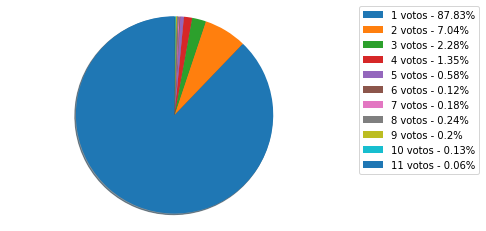

['1 - 35350 - 85.48%', '2 - 2832 - 6.85%', '3 - 916 - 2.22%', '4 - 543 - 1.31%', '5 - 235 - 0.57%', '6 - 47 - 0.11%', '7 - 73 - 0.18%', '8 - 95 - 0.23%', '9 - 79 - 0.19%', '10 - 54 - 0.13%', '11 - 25 - 0.06%']


In [72]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

votos_por_acordao = {}   
total_votos = 0
for acordao in acordaos:
    if len(acordao['votos']) > 0:
        total_votos += len(acordao['votos'])
        for voto in acordao['votos']:
            if "MIN_" in voto['votante']:
                if not acordao['numero'] in votos_por_acordao.keys():
                    votos_por_acordao[acordao['numero']] = 1
                else: 
                    votos_por_acordao[acordao['numero']] += 1

print("Total de votos: "+ str(total_votos))

# Plota grafico pizza
x = list(votos_por_acordao.values())
sizes = set(x)
labels = [str(x) for x in sizes]
contagem = [list(x).count(s) for s in sizes]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

patches, texts = plt.pie(contagem, shadow=True, startangle=90, radius=1.8, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, ["{0} votos - {2}%".format(l,c,round(100*c/sum(contagem),2)) for l,c in zip(labels,contagem)], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.show()

print(str(["{0} - {1} - {2}%".format(l,c, round(100*c/len(acordaos),2)) for l,c in zip(labels,contagem)]))

# Exibe numero de acordaos com mais de 15 votos
# (utilizado para buscar inconsistências)
l = [(n,x) for n,x in votos_por_acordao.items() if x > 15]
l.sort(key=lambda k:k[1])
if len(l) > 0:
    print(str(l))



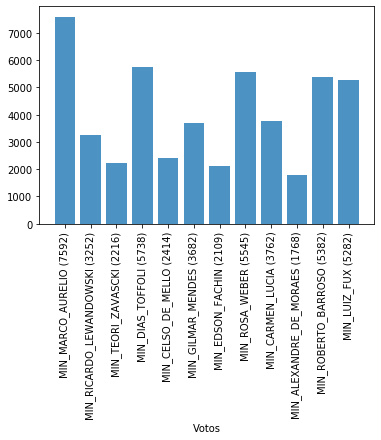

{'MIN_MARCO_AURELIO': 7592, 'MIN_RICARDO_LEWANDOWSKI': 3252, 'MIN_TEORI_ZAVASCKI': 2216, 'MIN_DIAS_TOFFOLI': 5738, 'MIN_CELSO_DE_MELLO': 2414, 'MIN_GILMAR_MENDES': 3682, 'MIN_EDSON_FACHIN': 2109, 'MIN_ROSA_WEBER': 5545, 'MIN_CARMEN_LUCIA': 3762, 'MIN_ALEXANDRE_DE_MORAES': 1768, 'MIN_ROBERTO_BARROSO': 5382, 'MIN_LUIZ_FUX': 5282}
Total de votos: 48742


In [55]:
MINISTROS_OK = ['MIN_GILMAR_MENDES', 'MIN_MARCO_AURELIO', 'MIN_RICARDO_LEWANDOWSKI', 
               'MIN_TEORI_ZAVASCKI', 'MIN_DIAS_TOFFOLI', 'MIN_CELSO_DE_MELLO', 
               'MIN_GILMAR_MENDES', 'MIN_EDSON_FACHIN', 'MIN_ROSA_WEBER', 'MIN_CARMEN_LUCIA', 'MIN_LUIZ_FUX',
               'MIN_ALEXANDRE_DE_MORAES', 'MIN_ROBERTO_BARROSO']

votos_ministros = {}

for acordao in acordaos:
    for voto in acordao['votos']:
        if voto['votante'] in MINISTROS_OK:
            if not voto['votante'] in votos_ministros.keys():
                votos_ministros[voto['votante']] = 1
            else: 
                votos_ministros[voto['votante']] += 1

            
# Plota um grafico de barras
objects = ["{0} ({1})".format(m, votos_ministros[m]) for m in list(votos_ministros.keys())]
#print(str([o for o in objects if 'pg' not in o]))
y_pos = np.arange(len(objects))
performance = [x for x in votos_ministros.values()]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects, rotation=90)
plt.xlabel('Votos')
#plt.title('Votos por Ministro')

plt.show()
print(str(votos_ministros))
print("Total de votos: {0}".format(sum(performance)))

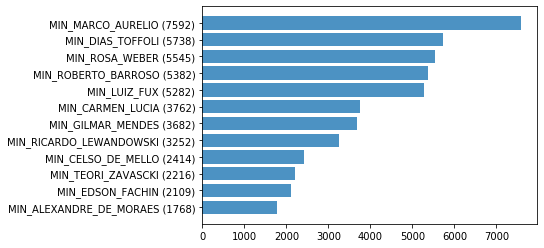

{'MIN_MARCO_AURELIO': 7592, 'MIN_RICARDO_LEWANDOWSKI': 3252, 'MIN_TEORI_ZAVASCKI': 2216, 'MIN_DIAS_TOFFOLI': 5738, 'MIN_CELSO_DE_MELLO': 2414, 'MIN_GILMAR_MENDES': 3682, 'MIN_EDSON_FACHIN': 2109, 'MIN_ROSA_WEBER': 5545, 'MIN_CARMEN_LUCIA': 3762, 'MIN_ALEXANDRE_DE_MORAES': 1768, 'MIN_ROBERTO_BARROSO': 5382, 'MIN_LUIZ_FUX': 5282}
Total de votos: 48742


In [71]:
MINISTROS_OK = ['MIN_GILMAR_MENDES', 'MIN_MARCO_AURELIO', 'MIN_RICARDO_LEWANDOWSKI', 
               'MIN_TEORI_ZAVASCKI', 'MIN_DIAS_TOFFOLI', 'MIN_CELSO_DE_MELLO', 
               'MIN_GILMAR_MENDES', 'MIN_EDSON_FACHIN', 'MIN_ROSA_WEBER', 'MIN_CARMEN_LUCIA', 'MIN_LUIZ_FUX',
               'MIN_ALEXANDRE_DE_MORAES', 'MIN_ROBERTO_BARROSO']

votos_ministros = {}

for acordao in acordaos:
    for voto in acordao['votos']:
        if voto['votante'] in MINISTROS_OK:
            if not voto['votante'] in votos_ministros.keys():
                votos_ministros[voto['votante']] = 1
            else: 
                votos_ministros[voto['votante']] += 1

            
# Plota um grafico de barras
votos_mins_grafico = [(m, v) for m,v in votos_ministros.items()] 
votos_mins_grafico.sort(key=lambda r:r[1])

objects = ["{0} ({1})".format(m, v) for m,v in votos_mins_grafico]
y_pos = np.arange(len(objects))
performance = [x for _,x in votos_mins_grafico]

plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
#plt.xlabel('Votos')
#plt.title('Votos por Ministro')

plt.show()
print(str(votos_ministros))
print("Total de votos: {0}".format(sum(performance)))

['MIN_MARCO_AURELIO (4879)', 'MIN_DIAS_TOFFOLI (5212)', 'MIN_CELSO_DE_MELLO (1963)', 'MIN_GILMAR_MENDES (3283)', 'MIN_EDSON_FACHIN (1485)', 'MIN_ROSA_WEBER (4480)', 'MIN_CARMEN_LUCIA (3198)', 'MIN_ALEXANDRE_DE_MORAES (1329)', 'MIN_ROBERTO_BARROSO (4317)', 'MIN_LUIZ_FUX (4287)', 'MIN_RICARDO_LEWANDOWSKI (2623)', 'MIN_TEORI_ZAVASCKI (1962)']


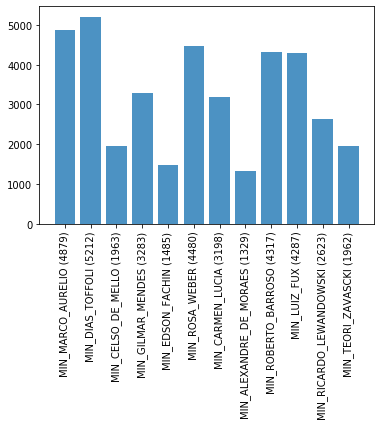

Total de relatórios: 39018


In [56]:
RELATORES_OK = [x.replace('.','').replace(' ','_') 
                for x in ['MIN. MARCO AURÉLIO', 'MIN. DIAS TOFFOLI', 'MIN. CELSO DE MELLO', 'MINISTRO PRESIDENTE', 
                          'MIN. GILMAR MENDES', 'MIN. EDSON FACHIN', 'MIN. ROSA WEBER', 'MIN. CÁRMEN LÚCIA', 'MIN. CARMEN LUCIA',
                          'MIN. ALEXANDRE DE MORAES', 'MIN. ROBERTO BARROSO', 'MIN. LUIZ FUX', 'MIN. RICARDO LEWANDOWSKI', 
                          'MIN. AYRES BRITTO', 'MIN. TEORI ZAVASCKI', 'MIN. JOAQUIM BARBOSA', 'MIN. CEZAR PELUSO', 
                          'MIN. ELLEN GRACIE', 'MIN. EROS GRAU', 'MIN. MENEZES DIREITO']]

# Relatorios por Ministro
relatorios_ministros = {}

for acordao in acordaos:    
    if acordao['relatorio']:
        #if not (acordao['relatorio']['relator'] == "" or acordao['relatorio']['relator'] == "VICE"):
         relator = acordao['relatorio']['relator'].replace('.','').replace(' ','_')
         if True or relator in RELATORES_OK:                
            if relator == "MIN_MARCO_AURÉLIO":
                relator = "MIN_MARCO_AURELIO"
            elif relator == "MIN_CÁRMEN_LÚCIA":
                relator = "MIN_CARMEN_LUCIA"
                
            if not relator in relatorios_ministros.keys():
                relatorios_ministros[relator] = 1
            else: 
                relatorios_ministros[relator] += 1

            
# Plota um grafico de barras
#objects = ["{0} ({1})".format(m, relatorios_ministros[m]) for m in list(relatorios_ministros.keys())] 
relat_mins_grafico = [(m, v) for m,v in relatorios_ministros.items() if v > 1000 and m != 'MINISTRO_PRESIDENTE'] 

objects = ["{0} ({1})".format(m, v) for m,v in relat_mins_grafico] 
print(str(objects))
y_pos = np.arange(len(objects))
performance = [v for _,v in relat_mins_grafico]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects, rotation=90)
#plt.xlabel('Relatórios')
#plt.title('Relatórios por Ministro')

plt.show()
print("Total de relatórios: {0}".format(sum(performance)))

['MIN_ALEXANDRE_DE_MORAES (1329)', 'MIN_EDSON_FACHIN (1485)', 'MIN_TEORI_ZAVASCKI (1962)', 'MIN_CELSO_DE_MELLO (1963)', 'MIN_RICARDO_LEWANDOWSKI (2623)', 'MIN_CARMEN_LUCIA (3198)', 'MIN_GILMAR_MENDES (3283)', 'MIN_LUIZ_FUX (4287)', 'MIN_ROBERTO_BARROSO (4317)', 'MIN_ROSA_WEBER (4480)', 'MIN_MARCO_AURELIO (4879)', 'MIN_DIAS_TOFFOLI (5212)']


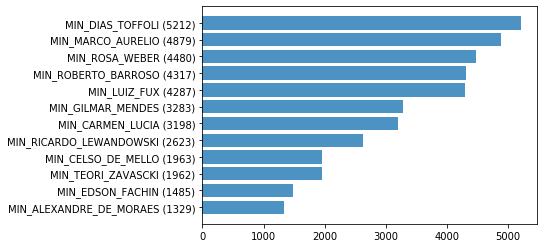

Total de relatórios: 39018


In [63]:
RELATORES_OK = [x.replace('.','').replace(' ','_') 
                for x in ['MIN. MARCO AURÉLIO', 'MIN. DIAS TOFFOLI', 'MIN. CELSO DE MELLO', 'MINISTRO PRESIDENTE', 
                          'MIN. GILMAR MENDES', 'MIN. EDSON FACHIN', 'MIN. ROSA WEBER', 'MIN. CÁRMEN LÚCIA', 'MIN. CARMEN LUCIA',
                          'MIN. ALEXANDRE DE MORAES', 'MIN. ROBERTO BARROSO', 'MIN. LUIZ FUX', 'MIN. RICARDO LEWANDOWSKI', 
                          'MIN. AYRES BRITTO', 'MIN. TEORI ZAVASCKI', 'MIN. JOAQUIM BARBOSA', 'MIN. CEZAR PELUSO', 
                          'MIN. ELLEN GRACIE', 'MIN. EROS GRAU', 'MIN. MENEZES DIREITO']]

# Relatorios por Ministro
relatorios_ministros = {}

for acordao in acordaos:    
    if acordao['relatorio']:
        #if not (acordao['relatorio']['relator'] == "" or acordao['relatorio']['relator'] == "VICE"):
         relator = acordao['relatorio']['relator'].replace('.','').replace(' ','_')
         if True or relator in RELATORES_OK:                
            if relator == "MIN_MARCO_AURÉLIO":
                relator = "MIN_MARCO_AURELIO"
            elif relator == "MIN_CÁRMEN_LÚCIA":
                relator = "MIN_CARMEN_LUCIA"
                
            if not relator in relatorios_ministros.keys():
                relatorios_ministros[relator] = 1
            else: 
                relatorios_ministros[relator] += 1

            
# Plota um grafico de barras
#objects = ["{0} ({1})".format(m, relatorios_ministros[m]) for m in list(relatorios_ministros.keys())] 
relat_mins_grafico = [(m, v) for m,v in relatorios_ministros.items() if v > 1000 and m != 'MINISTRO_PRESIDENTE'] 
relat_mins_grafico.sort(key=lambda r:r[1])

objects = ["{0} ({1})".format(m, v) for m,v in relat_mins_grafico] 
print(str(objects))
x_pos = np.arange(len(objects))
performance = [v for _,v in relat_mins_grafico]

plt.barh(x_pos, performance, align='center', alpha=0.8)
plt.yticks(x_pos, objects)
#plt.xlabel('Relatórios')
#plt.title('Relatórios por Ministro')

plt.show()
print("Total de relatórios: {0}".format(sum(performance)))

In [193]:
from bson.objectid import ObjectId

# Busca acordao repetidos
unicos = set({})
repetidos = []
for acordao in acordaos: 
    if acordao['numero'] not in unicos:
        unicos.add(acordao['numero'])
    else:        
        repetidos.append(ObjectId(acordao['_id']))
       
print("Acordãos repetidos {}".format(len(repetidos)))


Acordãos repetidos 0


In [194]:
# Problemas do pré-processamento a serem corrigidos
# Situações onde o relator é "relator" : "MINISTRO PRESIDENTE"
# Situações onde o votantte é "votante" : "MINISTRO_PRESIDENTE"
# Ver:
#     "_id" : ObjectId("5d068dc15e68f4960e51a5f4"),
#     acordao['1144297']

prob_min_presidente = [docacordao for docacordao in collection.find({'votos.votante': "MINISTRO_PRESIDENTE"})]
print("Acordaos com votante MINISTRO_PRESIDENTE: {}".format(len(prob_min_presidente)))

prob_relator_presidente = [docacordao for docacordao in collection.find({'relatorio.relator': "MINISTRO PRESIDENTE"})]
print("Acordaos com relator MINISTRO_PRESIDENTE: {}".format(len(prob_relator_presidente)))

# Situações onde as partes ou ementas de confundem
# Ver:
#      "_id" : ObjectId("5d068dc15e68f4960e51a5f3"),
#      acordao['111567']
problemas_ementa = [docacordao for docacordao in collection.find({'ementa':{'texto': ""}})]
print("Acordaos com ementa vazia: {}".format(len(problemas_ementa)))

Acordaos com votante MINISTRO_PRESIDENTE: 1180
Acordaos com relator MINISTRO_PRESIDENTE: 1125
Acordaos com ementa vazia: 7


In [195]:
# Avalia campos inseridos e outras coisas
tipos_relatores = {}
tipos_partes = {}
tipos_votantes = {}
acordaos_sem_rel = []
acordaos_sem_partes = []
acordaos_sem_votos = []
for acordao in acordaos:
    if acordao['relatorio']:
        if not acordao['relatorio']['relator'] in tipos_relatores.keys():
            tipos_relatores[acordao['relatorio']['relator']] = [acordao['numero']]
        else:
            tipos_relatores[acordao['relatorio']['relator']].append(acordao['numero'])       
    else:
        acordaos_sem_rel.append(acordao['numero'])
        
    
    if len(acordao['partes']) > 0:
        for parte in acordao['partes']:
            if not parte['tipo'] in tipos_partes.keys():             
                tipos_partes[parte['tipo']] = [acordao['numero']]
            else:
                tipos_partes[parte['tipo']].append(acordao['numero'])
    else:
        acordaos_sem_partes.append(acordao['numero'])
            
    if len(acordao['votos']) > 0:
        for voto in acordao['votos']:
            if not voto['votante'] in tipos_votantes.keys():            
                tipos_votantes[voto['votante']] = [acordao['numero']]
            else:
                tipos_votantes[voto['votante']].append(acordao['numero'])
    else:
        acordaos_sem_votos.append(acordao['numero'])
    
            
acordaos_sem_rel = set(acordaos_sem_rel)           
acordaos_sem_partes = set(acordaos_sem_partes)
acordaos_sem_votos = set(acordaos_sem_votos)

print("\nTotal de acordaos sem relatório {} \nLista: {}".format(len(acordaos_sem_rel),str(acordaos_sem_rel)))
print("\nTotal de acordaos sem partes {} \nLista: {}".format(len(acordaos_sem_partes),str(acordaos_sem_partes)))
print("\nTotal de acordaos sem votos {} \nLista: {}".format(len(acordaos_sem_votos),str(acordaos_sem_votos)))
print("\n\nTotal de acordaos sem votos, partes e relatório: {}".format(len((acordaos_sem_rel.intersection(acordaos_sem_partes)).intersection(acordaos_sem_votos))))
print("\n\nTotal de acordaos sem votos e relatório: {}".format(len(acordaos_sem_rel.intersection(acordaos_sem_votos))))




Total de acordaos sem relatório 0 
Lista: set()

Total de acordaos sem partes 0 
Lista: set()

Total de acordaos sem votos 0 
Lista: set()


Total de acordaos sem votos, partes e relatório: 0


Total de acordaos sem votos e relatório: 0


In [212]:

print("\n\nTipos Relatores:")
print(str(tipos_relatores.keys()))




Tipos Relatores:
dict_keys(['MIN. MARCO AURÉLIO', 'MIN. DIAS TOFFOLI', 'MIN. CELSO DE MELLO', 'MINISTRO PRESIDENTE', 'MIN. GILMAR MENDES', 'MIN. EDSON FACHIN', 'MIN. ROSA WEBER', 'MIN. CÁRMEN LÚCIA', 'MIN. ALEXANDRE DE MORAES', 'MIN. ROBERTO BARROSO', 'MIN. LUIZ FUX', 'MIN. RICARDO LEWANDOWSKI', 'MIN. AYRES BRITTO', 'MIN. TEORI ZAVASCKI', 'MIN. JOAQUIM BARBOSA', 'MIN. CEZAR PELUSO', 'MIN. ELLEN GRACIE', '', 'VICE', 'MIN. EROS GRAU', 'MIN. MENEZES DIREITO'])


In [197]:
print("\n\nTipos Partes:\n")
outras_partes = []
for p,c in  tipos_partes.items():
    if p not in PARTES_OK or p == "":
        print("{0} - {1}".format(p,c))
        outras_partes += c

print("\n\nTotal de acordãos com partes fora do padrão: {}".format(len(set(outras_partes))))
print("Outras Partes: {}".format(outras_partes))




Tipos Partes:



Total de acordãos com partes fora do padrão: 0
Outras Partes: []
